In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [10]:
gas2021 = [73.86, 74.39, 85.06, 77.12, 81.56, 83.72, 85.36, 85.72, 85.26, 85.06, 86.26, 87.18, 87.04, 91.05, 92.62, 94.08, 94.95, 93.77, 94.68, 95.36, 95.87]

In [11]:
df = pd.DataFrame()
df['value'] = gas2021

result = adfuller(gas2021)
print(result)

(2.5727735327318193, 0.9990696209334511, 8, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, 20.294545271924466)


In [12]:
df.index

RangeIndex(start=0, stop=21, step=1)

In [13]:
df.head(100)

,value
0,73.86
1,74.39
2,85.06
3,77.12
4,81.56
5,83.72
6,85.36
7,85.72
8,85.26
9,85.06


In [14]:
print('ADF Statistic: %f' % result[0])

ADF Statistic: 2.572774


In [15]:
# p value > 0.05, therefore time series is not stationary
print('p-value: %f' % result[1])

p-value: 0.999070


In [16]:
y = df.value

# ADF TEST
print(ndiffs(y, test="adf"))

# KPSS TEST
print(ndiffs(y, test="kpss"))

# PP TEST
print(ndiffs(y, test="pp"))

2
1
0


In [17]:
stepwise_fit = auto_arima(df.value, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107.505, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=102.291, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=107.718, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=101.779, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=103.779, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=108.436, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.068 seconds


In [18]:
print(df.shape)

(21, 1)


In [19]:
train = df.iloc[:-9]
test = df.iloc[-9:]

In [20]:
print(train.shape, test.shape)

(12, 1) (9, 1)


In [37]:
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   11
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -27.707
Method:                       css-mle   S.D. of innovations              2.815
Date:                Wed, 01 Dec 2021   AIC                             63.413
Time:                        10:44:47   BIC                             65.005
Sample:                             1   HQIC                            62.410
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0256      0.366      2.802      0.005       0.308       1.743
ar.L1.D.value    -0.9460      0.269     -3.522      0.000      -1.473      -0.420
ar.L2.D.value    -0.6319      0.304     

C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


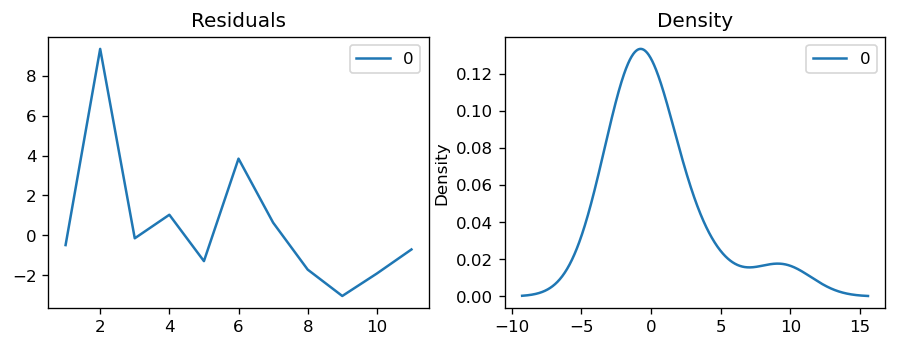

In [38]:
# checking residuals error
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind="kde", title="Density", ax=ax[1])
plt.show()

In [39]:
print(test.index)

RangeIndex(start=12, stop=21, step=1)


12    88.195175
13    89.297248
14    90.256972
15    91.296448
16    92.350429
17    93.340293
18    94.381647
19    95.414806
20    96.423180
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

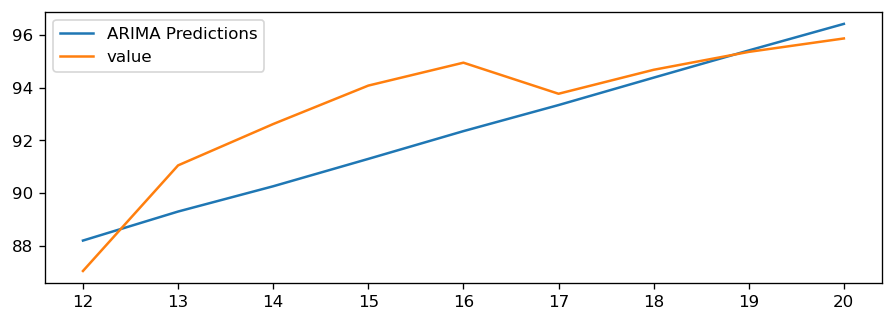

In [40]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
print(pred)
pred.plot(legend=True)
test['value'].plot(legend=True)

In [41]:
# accuracy metric
# average error = 55.83
test_mean = test.value.mean()
print(test_mean)
rmse = sqrt(mean_squared_error(pred, test['value']))
print(rmse)
accuracy = rmse/test_mean * 100
print('Average Error: ' + str(accuracy) + '%')

93.2688888888889
1.6693004046100517
Average Error: 1.7897719427093068%


C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   11
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -27.707
Method:                       css-mle   S.D. of innovations              2.815
Date:                Wed, 01 Dec 2021   AIC                             63.413
Time:                        10:44:50   BIC                             65.005
Sample:                             1   HQIC                            62.410
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0256      0.366      2.802      0.005       0.308       1.743
ar.L1.D.value    -0.9460      0.269     -3.522      0.000      -1.473      -0.420
ar.L2.D.value    -0.6319      0.304     

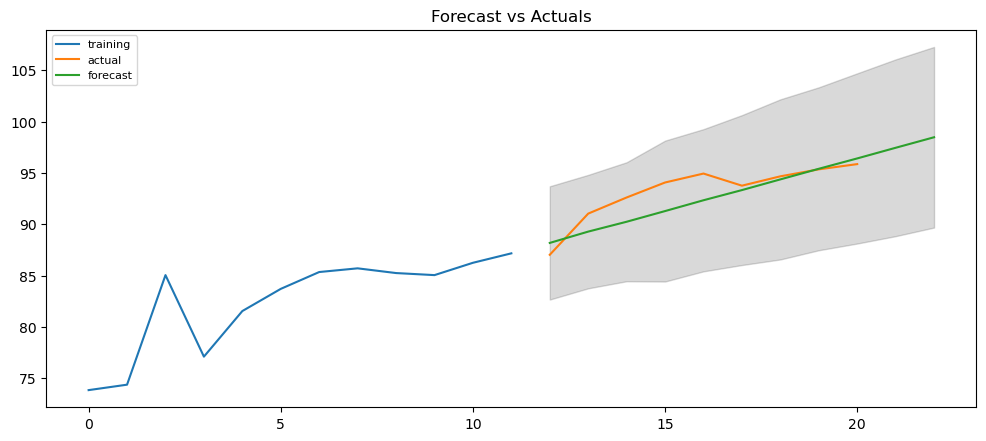

In [42]:
# Build Model
model = ARIMA(train.value, order=(2, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
fc_series.index = np.arange(12, 23)
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

print(fc_series)

# Plot
fig_final = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.value, label='training')
plt.plot(test.value, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [106]:
tbp2021 = [99.87, 99.29, 91.34, 99.41, 96.21, 96.7, 95.29, 92.56, 92.69, 91.34, 91.32, 92.03, 66.67, 80.97, 83.08, 81.5, 85.3, 87.74, 89.53, 90.86, 91.87]

In [107]:
df_2 = pd.DataFrame()
df_2['value'] = tbp2021

result = adfuller(tbp2021)
print(result)

(-2.5120741739157664, 0.1125641193040916, 0, 20, {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}, 84.0301258816716)


In [108]:
df_2

,value
0,99.87
1,99.29
2,91.34
3,99.41
4,96.21
5,96.70
6,95.29
7,92.56
8,92.69
9,91.34


In [109]:
print('ADF Statistics: %f' % result[0])

ADF Statistics: -2.512074


In [110]:
# p-value > 0.05, therefore time series is not stationary
print('p-value: %f' % result[1])

p-value: 0.112564


In [111]:
stepwise_fit = auto_arima(df_2.value, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=148.018, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=148.254, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=143.143, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=145.570, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=250.856, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=144.007, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=143.919, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=145.817, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.630 seconds


In [112]:
print(df_2.shape)
train = df_2.iloc[:-9]
test = df_2.iloc[-9:]

(21, 1)


In [113]:
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -30.578
Method:                       css-mle   S.D. of innovations              3.079
Date:                Tue, 30 Nov 2021   AIC                             67.157
Time:                        16:51:20   BIC                             68.611
Sample:                             0   HQIC                            66.618
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          94.9219      1.280     74.179      0.000      92.414      97.430
ar.L1.value     0.3301      0.299      1.102      0.270      -0.257       0.917
                                    Roots       

C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


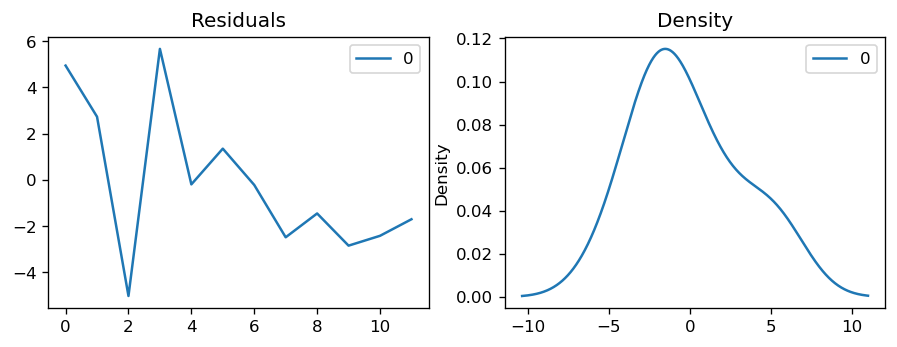

In [114]:
# checking residuals error
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind="kde", title="Density", ax=ax[1])
plt.show()

<AxesSubplot:>

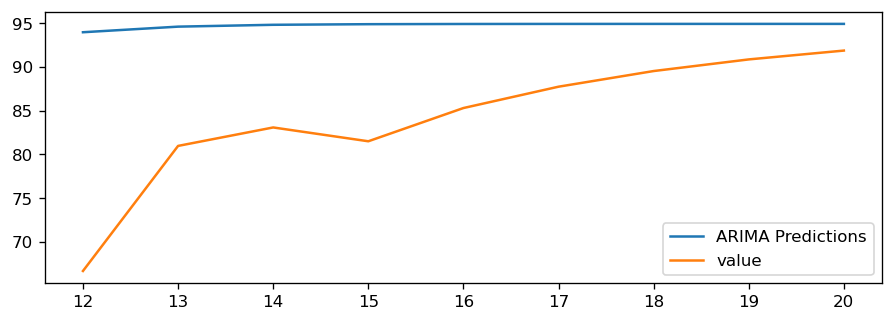

In [115]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['value'].plot(legend=True)

In [116]:
# accuracy metric
# average error = 55.83
test_mean = test.value.mean()
print(test_mean)
rmse = sqrt(mean_squared_error(pred, test['value']))
print(rmse)
accuracy = rmse/test_mean * 100
print('Average Error: ' + str(accuracy) + '%')

84.16888888888889
12.679260124282086
Average Error: 15.064069743180216%


C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -30.578
Method:                       css-mle   S.D. of innovations              3.079
Date:                Tue, 30 Nov 2021   AIC                             67.157
Time:                        16:53:08   BIC                             68.611
Sample:                             0   HQIC                            66.618
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          94.9219      1.280     74.179      0.000      92.414      97.430
ar.L1.value     0.3301      0.299      1.102      0.270      -0.257       0.917
                                    Roots       

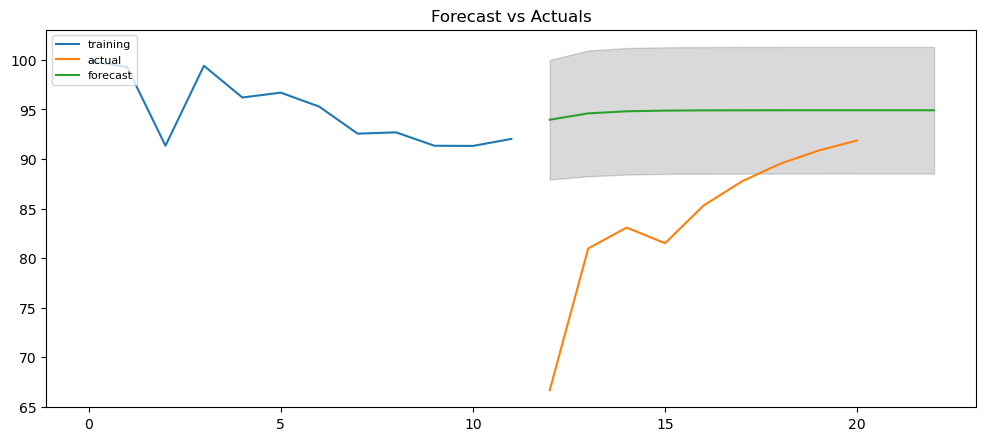

In [117]:
# Build Model
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
fc_series.index = np.arange(12, 23)
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

print(fc_series)

# Plot
fig_final = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [118]:
tbe2021 = [99.54, 98.63, 92.07, 91.58, 93.2, 92.99, 90.45, 91.59, 91.18, 92.07, 92.78, 90.23, 100, 67.8, 61.11, 70.83, 76.82, 80.66, 83.49, 85.6, 87.18]

In [119]:
df_3 = pd.DataFrame()
df_3['value'] = tbe2021

result = adfuller(tbe2021)
print(result)

(-2.1254864214828113, 0.23439062756283158, 0, 20, {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}, 91.33329518021311)


In [120]:
df_3

,value
0,99.54
1,98.63
2,92.07
3,91.58
4,93.20
5,92.99
6,90.45
7,91.59
8,91.18
9,92.07


In [121]:
print('ADF Statistics: %f' % result[0])

ADF Statistics: -2.125486


In [122]:
# p-value > 0.05, time series is not stationary
print('p-value: %f' % result[1])

p-value: 0.234391


In [123]:
stepwise_fit = auto_arima(df_3.value, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=156.804, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=160.902, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=151.219, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=153.242, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=249.511, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=152.884, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=152.842, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=154.789, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.549 seconds


In [124]:
print(df_3.shape)
train = df_3.iloc[:-9]
test = df_3.iloc[-9:]

(21, 1)


In [125]:
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -27.281
Method:                       css-mle   S.D. of innovations              2.281
Date:                Tue, 30 Nov 2021   AIC                             60.563
Time:                        16:53:35   BIC                             62.018
Sample:                             0   HQIC                            60.024
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.5762      2.005     46.664      0.000      89.646      97.507
ar.L1.value     0.7161      0.254      2.825      0.005       0.219       1.213
                                    Roots       

C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


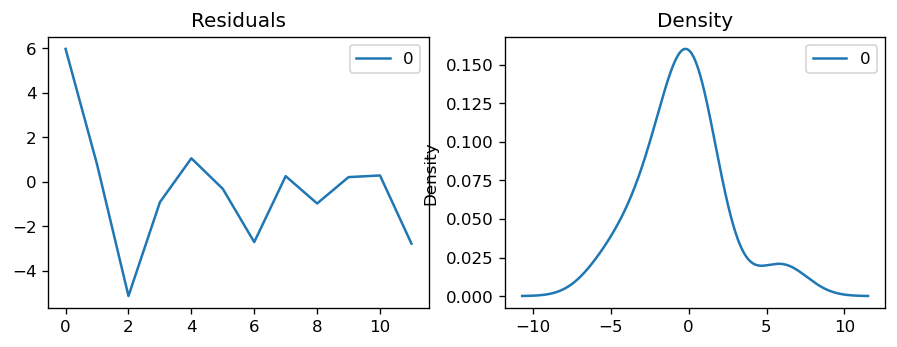

In [126]:
# checking residuals error
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind="kde", title="Density", ax=ax[1])
plt.show()

<AxesSubplot:>

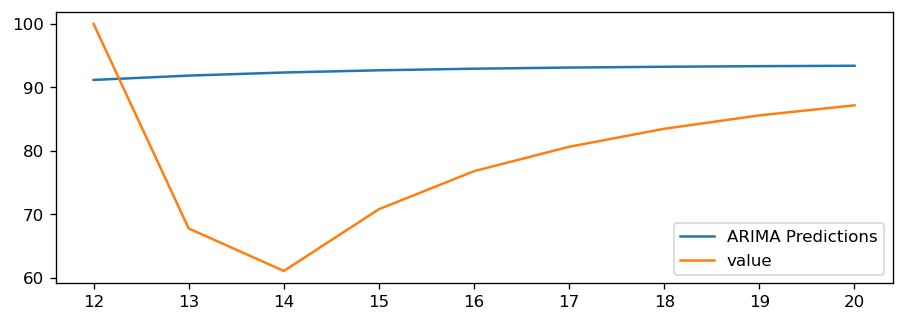

In [127]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['value'].plot(legend=True)

In [128]:
# accuracy metric
# average error = 55.83
test_mean = test.value.mean()
print(test_mean)
rmse = sqrt(mean_squared_error(pred, test['value']))
print(rmse)
accuracy = rmse/test_mean * 100
print('Average Error: ' + str(accuracy) + '%')

79.27666666666667
17.38482969695521
Average Error: 21.929314674711193%


C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -27.281
Method:                       css-mle   S.D. of innovations              2.281
Date:                Tue, 30 Nov 2021   AIC                             60.563
Time:                        16:54:57   BIC                             62.018
Sample:                             0   HQIC                            60.024
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.5762      2.005     46.664      0.000      89.646      97.507
ar.L1.value     0.7161      0.254      2.825      0.005       0.219       1.213
                                    Roots       

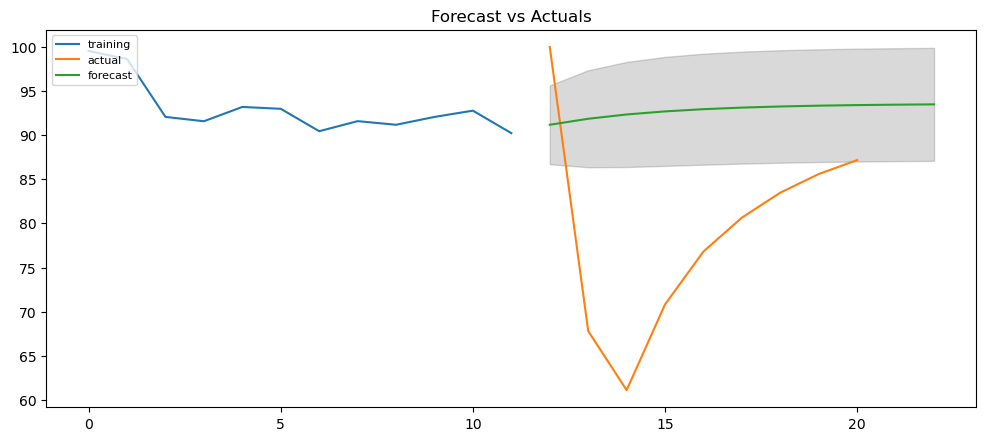

In [129]:
# Build Model
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
fc_series.index = np.arange(12, 23)
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

print(fc_series)

# Plot
fig_final = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()